In [33]:
import pandas as pd
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime as dt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'png'


In [34]:
def add_value_labels(ax, typ, spacing=5):
    space = spacing
    va = 'bottom'

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va)     
    if typ == 'line':
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va=va)   

In [35]:
df = pd.read_csv('.\data/london_merged_v4.csv')


In [36]:
df['time_hour_n'] = pd.to_datetime(df['time'])
df['time_hour_n'] = pd.to_datetime(df['time_hour_n'])
df['time_hour_n'] = df.time_hour_n.apply(lambda x : x.strftime('%H'))
df['time_hour_n']= df['time_hour_n'].astype('int64')
df['month_n'] = pd.to_datetime(df['timestamp']).dt.month


In [37]:
df.columns

Index(['index', 'timestamp', 'date', 'year', 'month', 'day', 'day_name',
       'week_number', 'time', 'bike_number', 'temperature',
       'temperature_feels', 'hum', 'wind_speed', 'weather_code',
       'weather_code_n', 'is_holiday', 'is_weekend', 'season', 'time_hour_n',
       'month_n'],
      dtype='object')

In [38]:
df.weather_code.value_counts()

Clear                  6120
Few clouds             4027
Broken clouds          3538
Light rain             2127
Cloudy                 1457
Snowfall                 59
Rain & Thunderstorm      14
Name: weather_code, dtype: int64

In [39]:
df['season']=df.season.map({0: 'spring', 1: 'summer',2:'autumn', 3:'winter'})

In [40]:
df.isnull().sum()

index                0
timestamp            0
date                 0
year                 0
month                0
day                  0
day_name             0
week_number          0
time                 0
bike_number          0
temperature          0
temperature_feels    0
hum                  0
wind_speed           0
weather_code         0
weather_code_n       0
is_holiday           0
is_weekend           0
season               0
time_hour_n          0
month_n              0
dtype: int64

In [41]:
df

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,...,temperature_feels,hum,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season,time_hour_n,month_n
0,0,2015-01-04 00:00:00,04-01-2015,2015,Jan,4,Sunday,1,00:00,182,...,2.0,93.0,6.0,Broken clouds,3,0.0,1.0,winter,0,1
1,1,2015-01-04 01:00:00,04-01-2015,2015,Jan,4,Sunday,1,01:00,138,...,2.5,93.0,5.0,Clear,1,0.0,1.0,winter,1,1
2,2,2015-01-04 02:00:00,04-01-2015,2015,Jan,4,Sunday,1,02:00,134,...,2.5,96.5,0.0,Clear,1,0.0,1.0,winter,2,1
3,3,2015-01-04 03:00:00,04-01-2015,2015,Jan,4,Sunday,1,03:00,72,...,2.0,100.0,0.0,Clear,1,0.0,1.0,winter,3,1
4,4,2015-01-04 04:00:00,04-01-2015,2015,Jan,4,Sunday,1,04:00,47,...,0.0,93.0,6.5,Clear,1,0.0,1.0,winter,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17337,17337,2016-12-31 19:00:00,31-12-2016,2016,Dec,31,Saturday,52,19:00,493,...,6.0,82.0,17.0,Cloudy,4,0.0,1.0,winter,19,12
17338,17338,2016-12-31 20:00:00,31-12-2016,2016,Dec,31,Saturday,52,20:00,465,...,6.5,84.5,13.0,Cloudy,4,0.0,1.0,winter,20,12
17339,17339,2016-12-31 21:00:00,31-12-2016,2016,Dec,31,Saturday,52,21:00,474,...,6.0,87.0,12.0,Cloudy,4,0.0,1.0,winter,21,12
17340,17340,2016-12-31 22:00:00,31-12-2016,2016,Dec,31,Saturday,52,22:00,587,...,6.0,90.0,12.0,Cloudy,4,0.0,1.0,winter,22,12


In [42]:
df.nunique().sort_values()

is_weekend               2
year                     2
is_holiday               2
season                   4
day_name                 7
weather_code_n           7
weather_code             7
month_n                 12
month                   12
time                    24
time_hour_n             24
day                     31
week_number             53
temperature             73
temperature_feels       82
wind_speed             103
hum                    143
date                   727
bike_number           3779
timestamp            17342
index                17342
dtype: int64

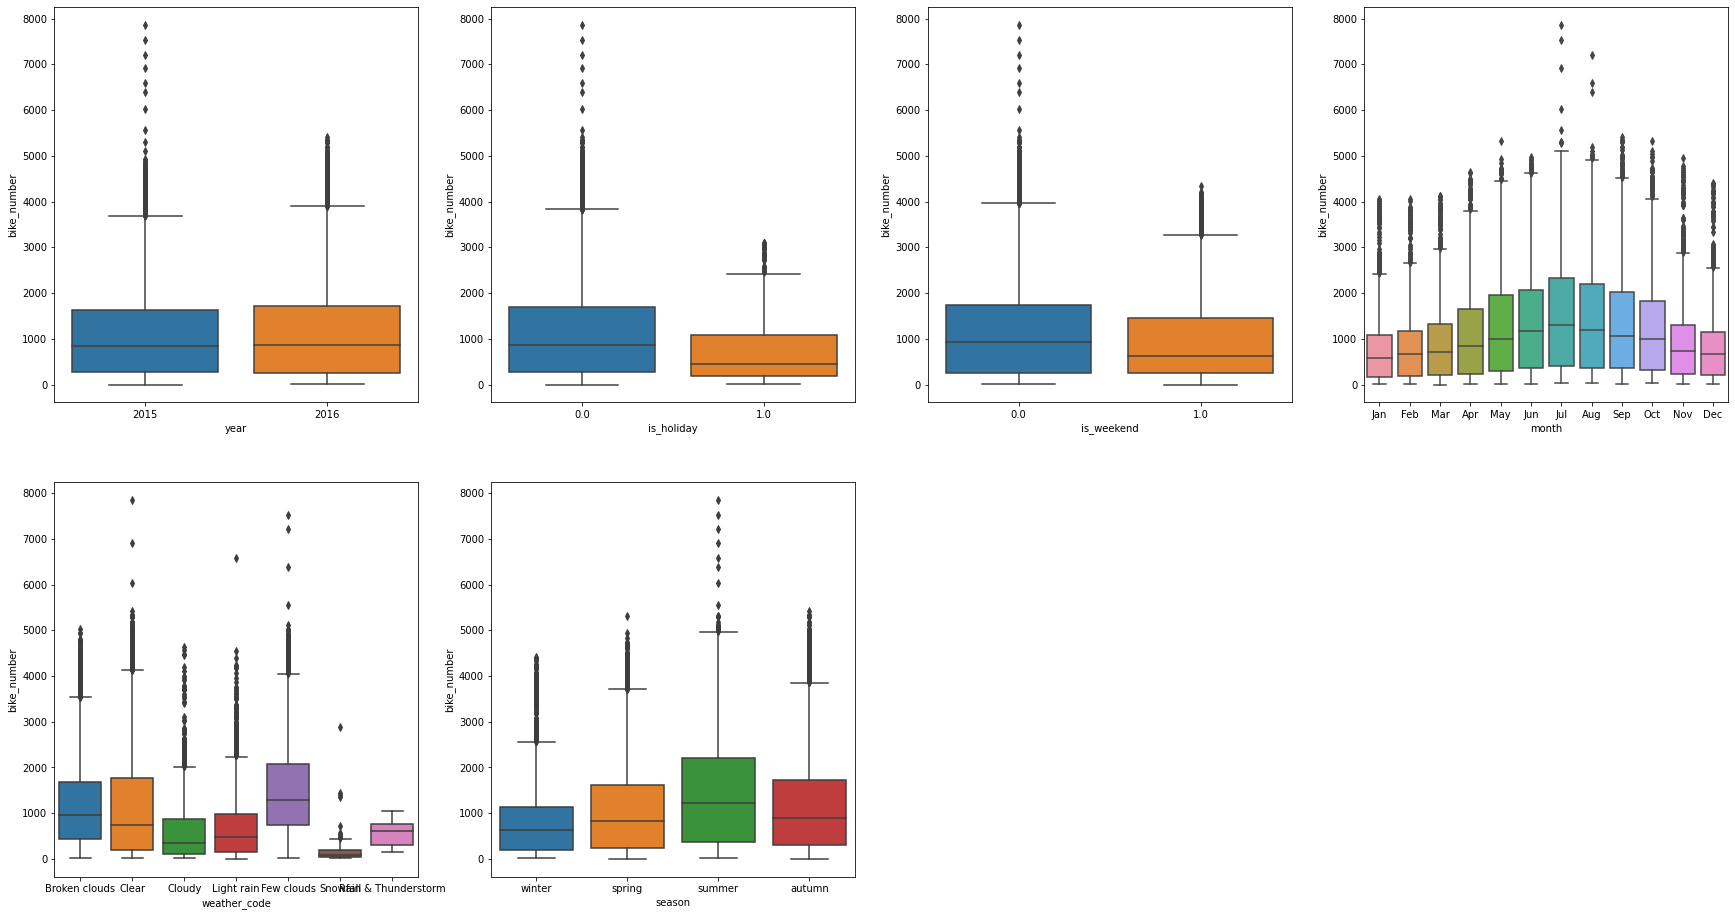

In [11]:
##Relationship between categorical and continuous variable
plt.figure(figsize=(30, 16))
plt.subplot(2,4,1)
sns.boxplot(x = 'year', y = 'bike_number', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'is_holiday', y = 'bike_number', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'is_weekend', y = 'bike_number', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'bike_number', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weather_code', y = 'bike_number', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'bike_number', data = df)
plt.show()

* Bike Rentals are more during the Fall season and then in summer
* Bike Rentals are more in the year 2016 compared to 2016
* Bike Rentals are more in partly cloudy weather


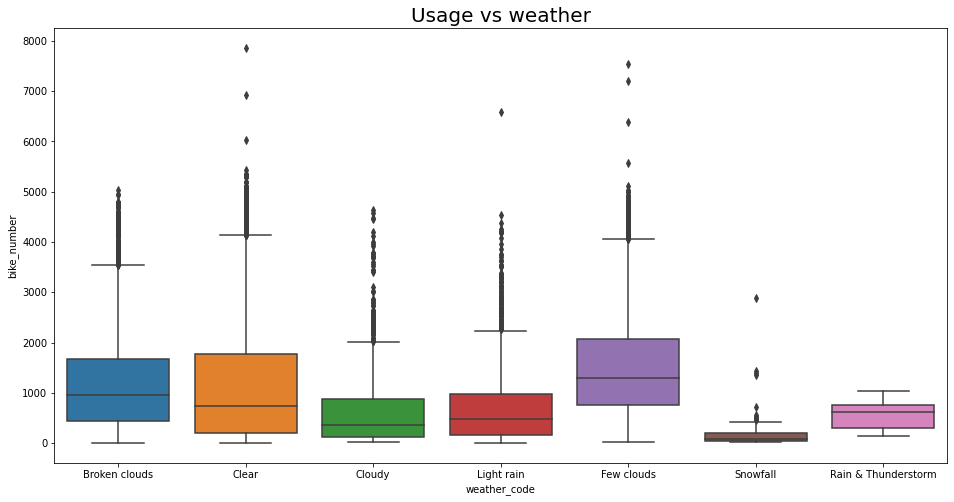

In [12]:
plt.figure(figsize=(16, 8))
sns.boxplot(x = 'weather_code', y = 'bike_number', data = df)
plt.title('Usage vs weather', size=20)
plt.savefig('.\Isra_plots/Usage_vs_season.png', dpi = 500);

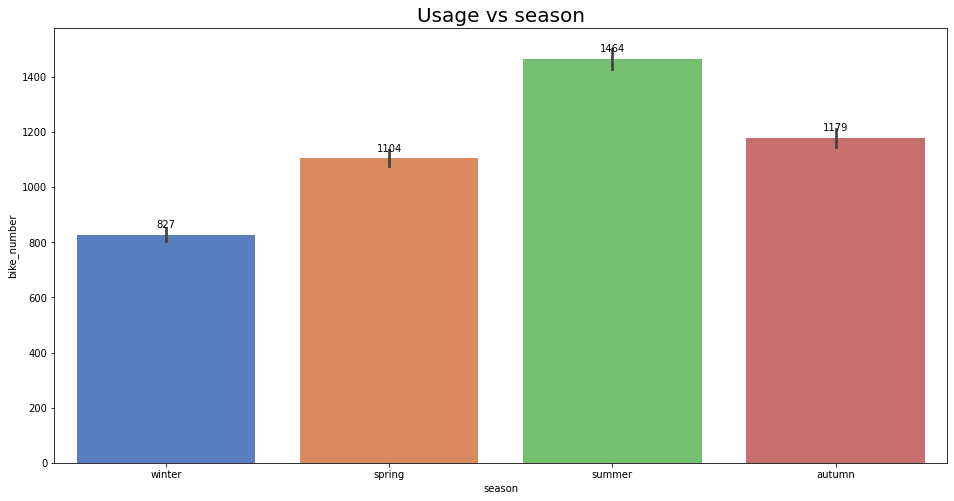

In [13]:
#Relation between weather and count of bike rentals
plt.figure(figsize=(16, 8))
season = sns.barplot('season','bike_number',palette="muted",data=df)
plt.title('Usage vs season', size=20)
plt.savefig('.\Isra_plots/Usage_vs_season.png', dpi = 500);
add_value_labels(season, typ='bar')
plt.show()

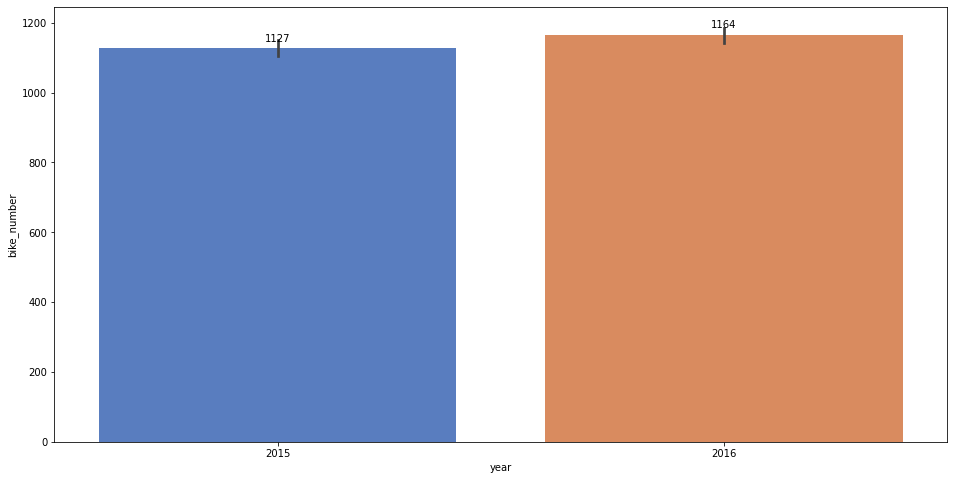

In [14]:
plt.figure(figsize=(16, 8))
season = sns.barplot('year','bike_number',palette="muted",data=df)
add_value_labels(season, typ='bar')

plt.show()

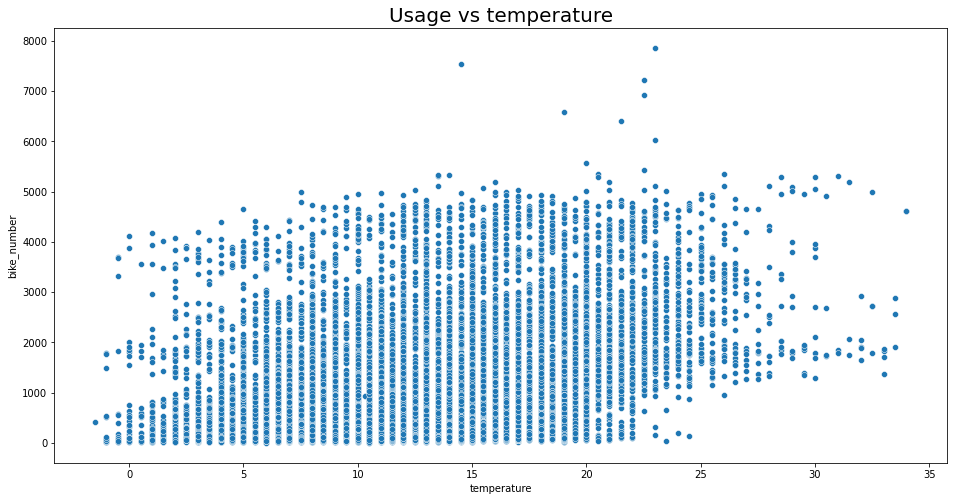

In [15]:
plt.figure(figsize=(16, 8))
season = sns.scatterplot('temperature','bike_number',palette="muted",data=df)
plt.title('Usage vs temperature', size=20)
plt.savefig('.\Isra_plots/Usage_vs_temperature.png', dpi = 500);
plt.show()

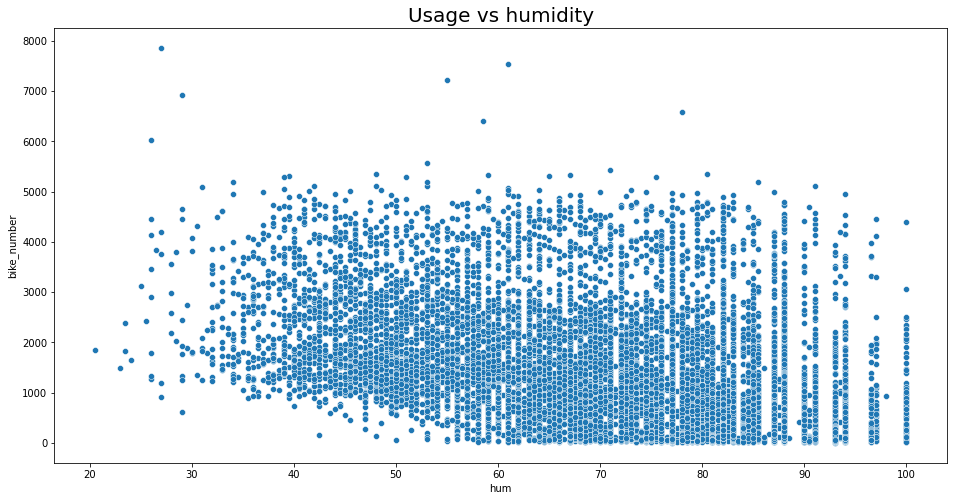

In [16]:
plt.figure(figsize=(16, 8))
season = sns.scatterplot('hum','bike_number',palette="muted",data=df)
plt.title('Usage vs humidity', size=20)
plt.savefig('.\Isra_plots/Usage_vs_humidity.png', dpi = 500);
plt.show()

<Figure size 432x288 with 0 Axes>

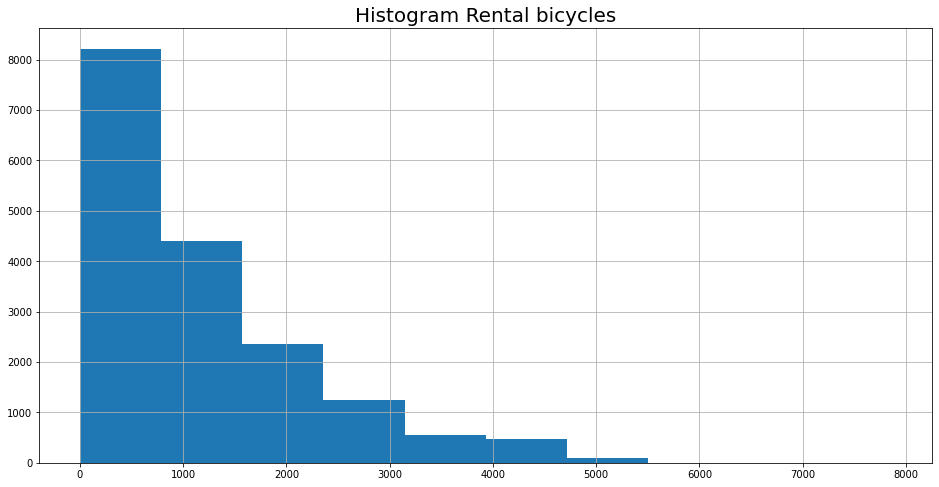

In [17]:
fig = plt.figure()
plt.figure(figsize=(16,8))
df['bike_number'].hist()
plt.title('Histogram Rental bicycles', size=20)
plt.savefig('.\Isra_plots/Bike_numberHist().png', dpi = 500);

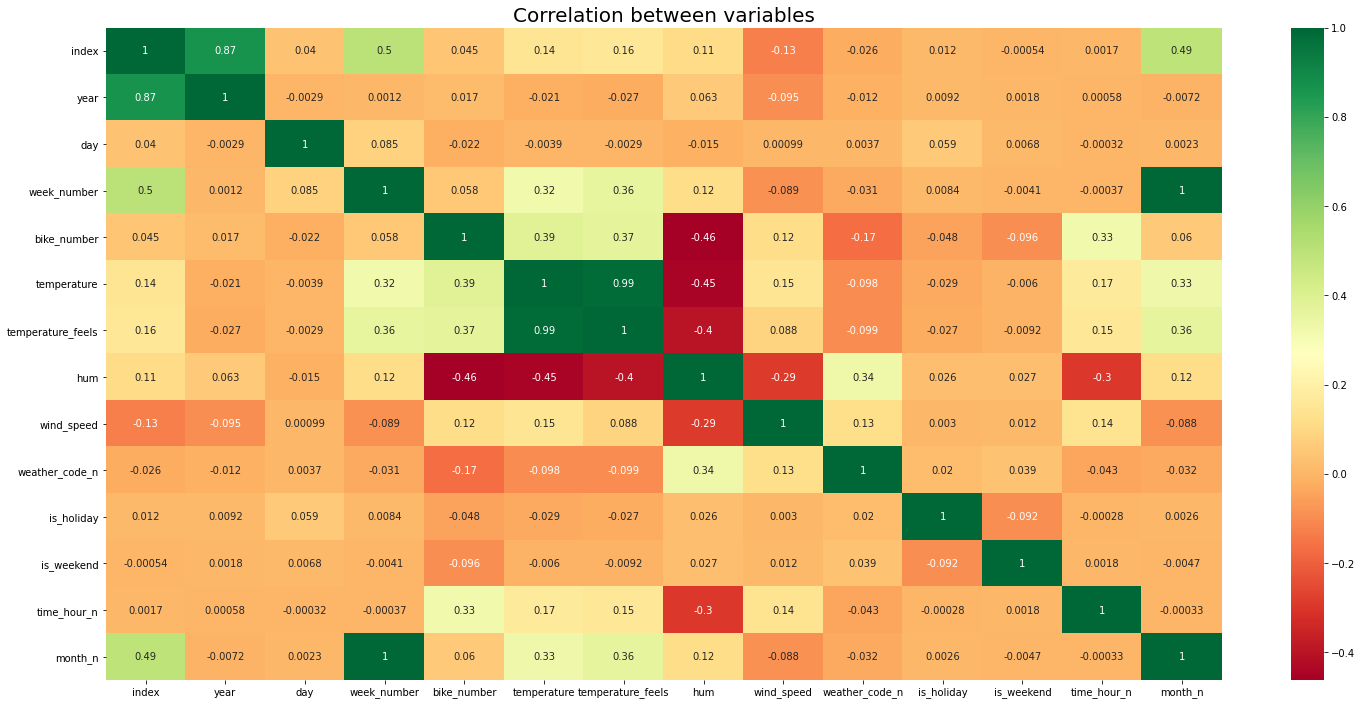

In [18]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between variables", size=20)
plt.savefig('.\Isra_plots/Correlation_between_variables_Stage0.png', dpi = 500);
plt.show()

In [19]:
df.corr().bike_number.abs().sort_values(ascending=False)

bike_number          1.000000
hum                  0.461812
temperature          0.387686
temperature_feels    0.367890
time_hour_n          0.325192
weather_code_n       0.166491
wind_speed           0.115708
is_weekend           0.095873
month_n              0.060369
week_number          0.057645
is_holiday           0.047960
index                0.044507
day                  0.021814
year                 0.017346
Name: bike_number, dtype: float64

In [20]:
df

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,...,temperature_feels,hum,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season,time_hour_n,month_n
0,0,2015-01-04 00:00:00,04-01-2015,2015,Jan,4,Sunday,1,00:00,182,...,2.0,93.0,6.0,Broken clouds,3,0.0,1.0,winter,0,1
1,1,2015-01-04 01:00:00,04-01-2015,2015,Jan,4,Sunday,1,01:00,138,...,2.5,93.0,5.0,Clear,1,0.0,1.0,winter,1,1
2,2,2015-01-04 02:00:00,04-01-2015,2015,Jan,4,Sunday,1,02:00,134,...,2.5,96.5,0.0,Clear,1,0.0,1.0,winter,2,1
3,3,2015-01-04 03:00:00,04-01-2015,2015,Jan,4,Sunday,1,03:00,72,...,2.0,100.0,0.0,Clear,1,0.0,1.0,winter,3,1
4,4,2015-01-04 04:00:00,04-01-2015,2015,Jan,4,Sunday,1,04:00,47,...,0.0,93.0,6.5,Clear,1,0.0,1.0,winter,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17337,17337,2016-12-31 19:00:00,31-12-2016,2016,Dec,31,Saturday,52,19:00,493,...,6.0,82.0,17.0,Cloudy,4,0.0,1.0,winter,19,12
17338,17338,2016-12-31 20:00:00,31-12-2016,2016,Dec,31,Saturday,52,20:00,465,...,6.5,84.5,13.0,Cloudy,4,0.0,1.0,winter,20,12
17339,17339,2016-12-31 21:00:00,31-12-2016,2016,Dec,31,Saturday,52,21:00,474,...,6.0,87.0,12.0,Cloudy,4,0.0,1.0,winter,21,12
17340,17340,2016-12-31 22:00:00,31-12-2016,2016,Dec,31,Saturday,52,22:00,587,...,6.0,90.0,12.0,Cloudy,4,0.0,1.0,winter,22,12


In [43]:
df.columns

Index(['index', 'timestamp', 'date', 'year', 'month', 'day', 'day_name',
       'week_number', 'time', 'bike_number', 'temperature',
       'temperature_feels', 'hum', 'wind_speed', 'weather_code',
       'weather_code_n', 'is_holiday', 'is_weekend', 'season', 'time_hour_n',
       'month_n'],
      dtype='object')

In [44]:
df = df[['month', 'day_name', 'bike_number', 'temperature', 'temperature_feels', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'time_hour_n']]

In [45]:
df.dtypes

month                 object
day_name              object
bike_number            int64
temperature          float64
temperature_feels    float64
hum                  float64
wind_speed           float64
weather_code          object
is_holiday           float64
is_weekend           float64
time_hour_n            int64
dtype: object

## Dummy variables


In [46]:
months=pd.get_dummies(df.month,drop_first=True)
day_names=pd.get_dummies(df.day_name,drop_first=True)
weather_codes=pd.get_dummies(df.weather_code,drop_first=True)
day_hours =  pd.get_dummies(df.time_hour_n, drop_first=True)


In [47]:
df=pd.concat([months, day_names,weather_codes, day_hours, df],axis=1)
df.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,day_name,bike_number,temperature,temperature_feels,hum,wind_speed,weather_code,is_holiday,is_weekend,time_hour_n
0,0,0,0,1,0,0,0,0,0,0,...,Sunday,182,3.0,2.0,93.0,6.0,Broken clouds,0.0,1.0,0
1,0,0,0,1,0,0,0,0,0,0,...,Sunday,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,1
2,0,0,0,1,0,0,0,0,0,0,...,Sunday,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,2
3,0,0,0,1,0,0,0,0,0,0,...,Sunday,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,3
4,0,0,0,1,0,0,0,0,0,0,...,Sunday,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,4


In [48]:
df.drop(['month','day_name','weather_code', 'time_hour_n'], axis = 1, inplace = True)
df.head()


,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,21,22,23,bike_number,temperature,temperature_feels,hum,wind_speed,is_holiday,is_weekend
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,182,3.0,2.0,93.0,6.0,0.0,1.0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,138,3.0,2.5,93.0,5.0,0.0,1.0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,134,2.5,2.5,96.5,0.0,0.0,1.0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,72,2.0,2.0,100.0,0.0,0.0,1.0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,47,2.0,0.0,93.0,6.5,0.0,1.0


In [49]:
df.shape

(17342, 53)

In [18]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), cmap='YlGnBu')
plt.title("Correlation between variables dummies ", size=20)
plt.savefig('.\Isra_plots/Correlation_between_variables_Stage1.png', dpi = 500);
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000018A7325A4C0> (for post_execute):


KeyboardInterrupt: 

### Splitting the Data into Training and Testing Sets

Before model building, you first need to perform the test-train split and scale the features.

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [52]:
print(df_train.shape)

(12139, 53)


In [53]:
print(df_test.shape)

(5203, 53)


#### Rescaling the Features

* There are two common ways of rescaling:

    * Min-Max scaling (Normalisation):Between 0 and 1

    * Standardisation :mean-0, sigma-1

In [54]:
#Normalisation = (x-xmin)/(x max-x min)
#Standardisation= (x-mu)/ sigma
#import the library
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()

In [56]:
df.columns

Index([                'Aug',                 'Dec',                 'Feb',
                       'Jan',                 'Jul',                 'Jun',
                       'Mar',                 'May',                 'Nov',
                       'Oct',                 'Sep',              'Monday',
                  'Saturday',              'Sunday',            'Thursday',
                   'Tuesday',           'Wednesday',               'Clear',
                    'Cloudy',          'Few clouds',          'Light rain',
       'Rain & Thunderstorm',            'Snowfall',                     1,
                           2,                     3,                     4,
                           5,                     6,                     7,
                           8,                     9,                    10,
                          11,                    12,                    13,
                          14,                    15,                    16,
            

In [57]:
num_vars=['temperature','hum','wind_speed','bike_number', 'temperature_feels']

In [58]:
#Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,21,22,23,bike_number,temperature,temperature_feels,hum,wind_speed,is_holiday,is_weekend
2179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.020611,0.228571,0.3250,0.753247,0.070796,0.0,1.0
3821,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0.306234,0.700000,0.7375,0.441558,0.230088,0.0,0.0
14381,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0.092366,0.557143,0.6125,0.779221,0.159292,1.0,0.0
1452,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0.128117,0.357143,0.4375,0.383117,0.345133,0.0,0.0
866,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.002672,0.142857,0.1750,0.831169,0.194690,0.0,0.0


<Figure size 432x288 with 0 Axes>

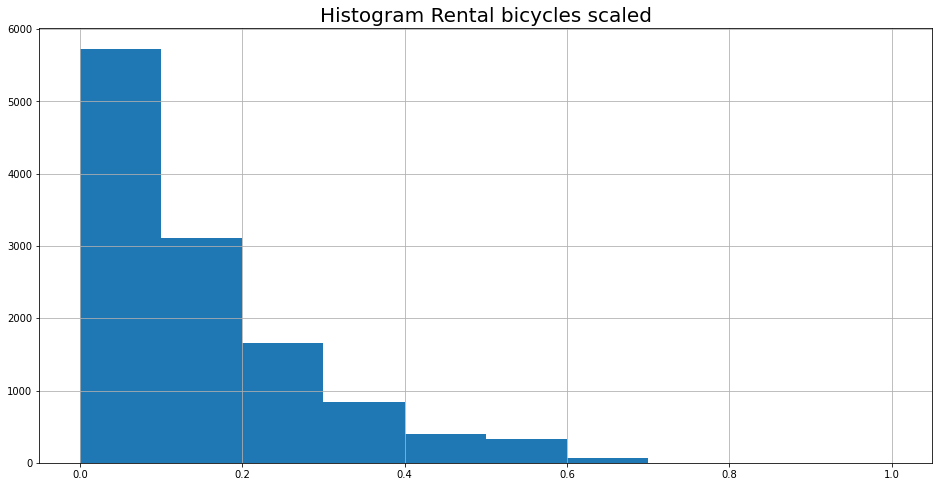

In [38]:
fig = plt.figure()
plt.figure(figsize=(16,8))
df_train['bike_number'].hist()
plt.title('Histogram Rental bicycles scaled', size=20)
plt.savefig('.\Isra_plots/Bike_numberScaledHist().png', dpi = 500);

In [59]:
df_train

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,21,22,23,bike_number,temperature,temperature_feels,hum,wind_speed,is_holiday,is_weekend
2179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.020611,0.228571,0.3250,0.753247,0.070796,0.0,1.0
3821,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0.306234,0.700000,0.7375,0.441558,0.230088,0.0,0.0
14381,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0.092366,0.557143,0.6125,0.779221,0.159292,1.0,0.0
1452,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0.128117,0.357143,0.4375,0.383117,0.345133,0.0,0.0
866,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.002672,0.142857,0.1750,0.831169,0.194690,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0.287023,0.200000,0.2500,0.623377,0.159292,0.0,0.0
79,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0.223537,0.185714,0.2125,0.753247,0.230088,0.0,0.0
12119,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0.165140,0.371429,0.4500,0.701299,0.115044,0.0,0.0
14147,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0.079771,0.514286,0.5750,0.844156,0.123894,0.0,0.0


In [40]:
df_train.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,21,22,23,bike_number,temperature,temperature_feels,hum,wind_speed,is_holiday,is_weekend
count,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,...,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000
mean,0.087075,0.085345,0.077766,0.077107,0.086004,0.082791,0.085839,0.086004,0.083368,0.084850,...,0.042508,0.040119,0.040613,0.145644,0.387254,0.440761,0.638987,0.282170,0.021501,0.283467
std,0.281956,0.279406,0.267814,0.266772,0.280381,0.275577,0.280138,0.280381,0.276449,0.278671,...,0.201753,0.196245,0.197400,0.138248,0.158334,0.164319,0.186378,0.140312,0.145053,0.450699
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.032570,0.271429,0.300000,0.519481,0.176991,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.108015,0.385714,0.462500,0.668831,0.265487,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.212532,0.500000,0.562500,0.779221,0.362832,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the numeric variables are now mapped between 0 and 1 - Except Hour



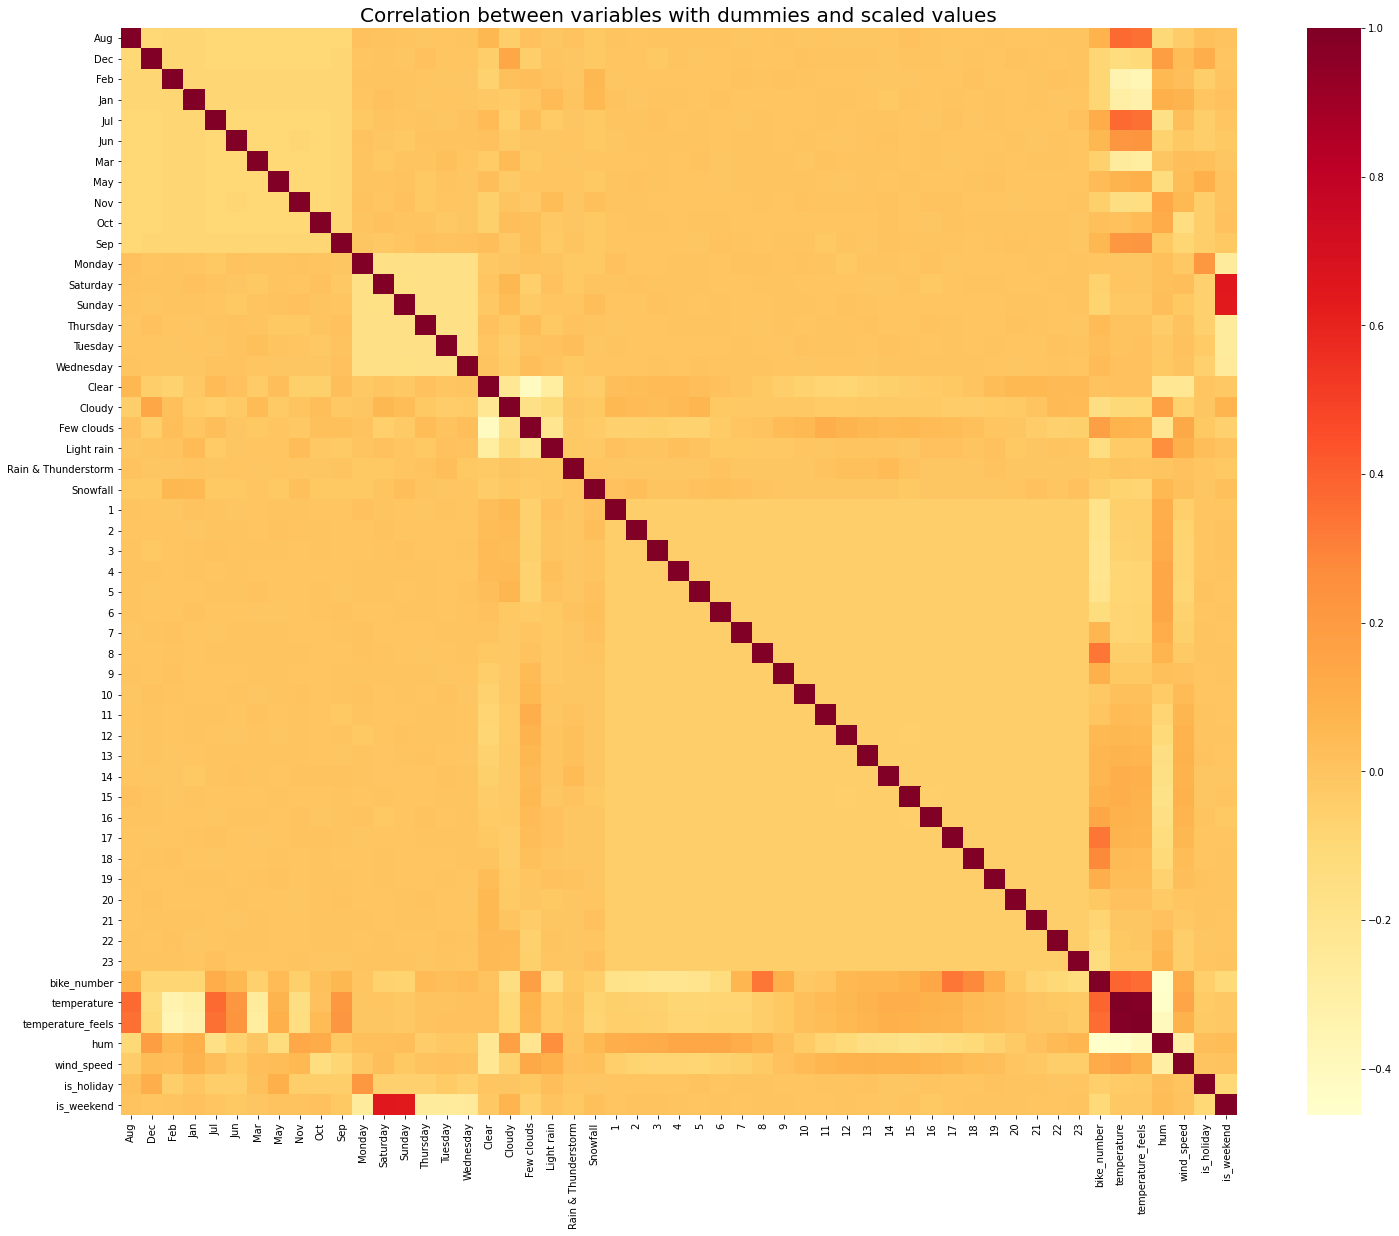

In [41]:
plt.figure(figsize=(25, 20))
sns.heatmap(df_train.corr(),cmap='YlOrRd')
plt.title("Correlation between variables with dummies and scaled values", size=20)
plt.savefig('.\Isra_plots/Correlation_between_variables_Stage2.png', dpi = 500);
plt.show()

Dividing into X and Y sets for the model building

In [60]:
y_train = df_train.pop('bike_number')
X_train = df_train

In [61]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

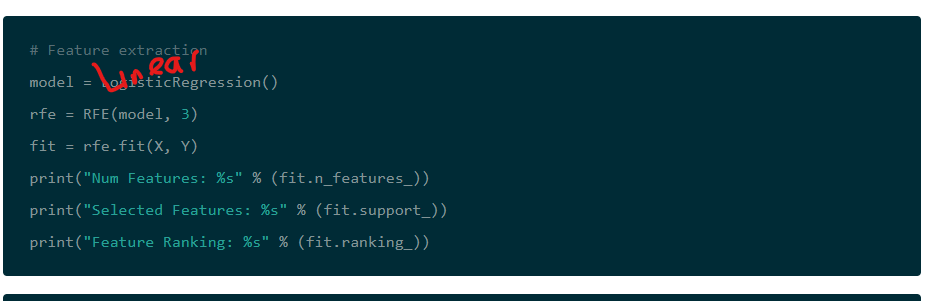

* https://github.com/junmoan/house-price-predicton-RFE-OLS/blob/master/House_Price_Regression_RFE_OLS.ipynb

* https://www.kaggle.com/carlmcbrideellis/recursive-feature-elimination-rfe-example

In [62]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [63]:
print("Num Features:",  (rfe.n_features_))



Num Features: 15


In [64]:
print("Selected Features:",  (rfe.support_))


Selected Features: [False False False False False False False False False False False False
  True  True False False False False False False False False False False
 False False False False False  True  True  True False False  True  True
 False  True  True  True  True  True False False False False  True False
  True False False  True]


In [65]:
print("Feature Ranking:",  (rfe.ranking_))

Feature Ranking: [33 22 28 30 29 37 27 23 36 15 38 35  1  1 25 26 24 34 32 31 13  2 21 20
 18 16 17 19 11  1  1  1  8  7  1  1  3  1  1  1  1  1  6 10 12 14  1  4
  1  5  9  1]


In [66]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 33),
 ('Dec', False, 22),
 ('Feb', False, 28),
 ('Jan', False, 30),
 ('Jul', False, 29),
 ('Jun', False, 37),
 ('Mar', False, 27),
 ('May', False, 23),
 ('Nov', False, 36),
 ('Oct', False, 15),
 ('Sep', False, 38),
 ('Monday', False, 35),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 25),
 ('Tuesday', False, 26),
 ('Wednesday', False, 24),
 ('Clear', False, 34),
 ('Cloudy', False, 32),
 ('Few clouds', False, 31),
 ('Light rain', False, 13),
 ('Rain & Thunderstorm', False, 2),
 ('Snowfall', False, 21),
 (1, False, 20),
 (2, False, 18),
 (3, False, 16),
 (4, False, 17),
 (5, False, 19),
 (6, False, 11),
 (7, True, 1),
 (8, True, 1),
 (9, True, 1),
 (10, False, 8),
 (11, False, 7),
 (12, True, 1),
 (13, True, 1),
 (14, False, 3),
 (15, True, 1),
 (16, True, 1),
 (17, True, 1),
 (18, True, 1),
 (19, True, 1),
 (20, False, 6),
 (21, False, 10),
 (22, False, 12),
 (23, False, 14),
 ('temperature', True, 1),
 ('temperature_feels', False, 4),
 ('hum', True,

In [67]:
summary = (pd.DataFrame([X_train.columns, rfe.support_, rfe.ranking_], 
                        index=['Predictor', 'RFE_Select', 'Rank'])
           .T.sort_values(by='Rank'))
summary

,Predictor,RFE_Select,Rank
51,is_weekend,True,1
30,8,True,1
31,9,True,1
34,12,True,1
35,13,True,1
37,15,True,1
38,16,True,1
29,7,True,1
13,Sunday,True,1
12,Saturday,True,1


In [68]:
X_train.columns[rfe.ranking_]

Index([                   11,            'Snowfall',                     6,
                           8,                     7,                    15,
                           5,                     1,                    14,
                   'Tuesday',                    16,                    13,
                       'Dec',                 'Dec',                     3,
                           4,                     2,                    12,
                          10,                     9,              'Sunday',
                       'Feb', 'Rain & Thunderstorm',          'Light rain',
                    'Cloudy',           'Wednesday',               'Clear',
                'Few clouds',              'Monday',                 'Dec',
                       'Dec',                 'Dec',                 'Nov',
                       'May',                 'Dec',                 'Dec',
                       'Jan',                 'Dec',                 'Dec',
            

In [69]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index([   'Saturday',      'Sunday',             7,             8,
                   9,            12,            13,            15,
                  16,            17,            18,            19,
       'temperature',         'hum',  'is_weekend'],
      dtype='object')

In [70]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index([                'Aug',                 'Dec',                 'Feb',
                       'Jan',                 'Jul',                 'Jun',
                       'Mar',                 'May',                 'Nov',
                       'Oct',                 'Sep',              'Monday',
                  'Thursday',             'Tuesday',           'Wednesday',
                     'Clear',              'Cloudy',          'Few clouds',
                'Light rain', 'Rain & Thunderstorm',            'Snowfall',
                           1,                     2,                     3,
                           4,                     5,                     6,
                          10,                    11,                    14,
                          20,                    21,                    22,
                          23,   'temperature_feels',          'wind_speed',
                'is_holiday'],
      dtype='object')

In [71]:
X_train_rfe = X_train[col]

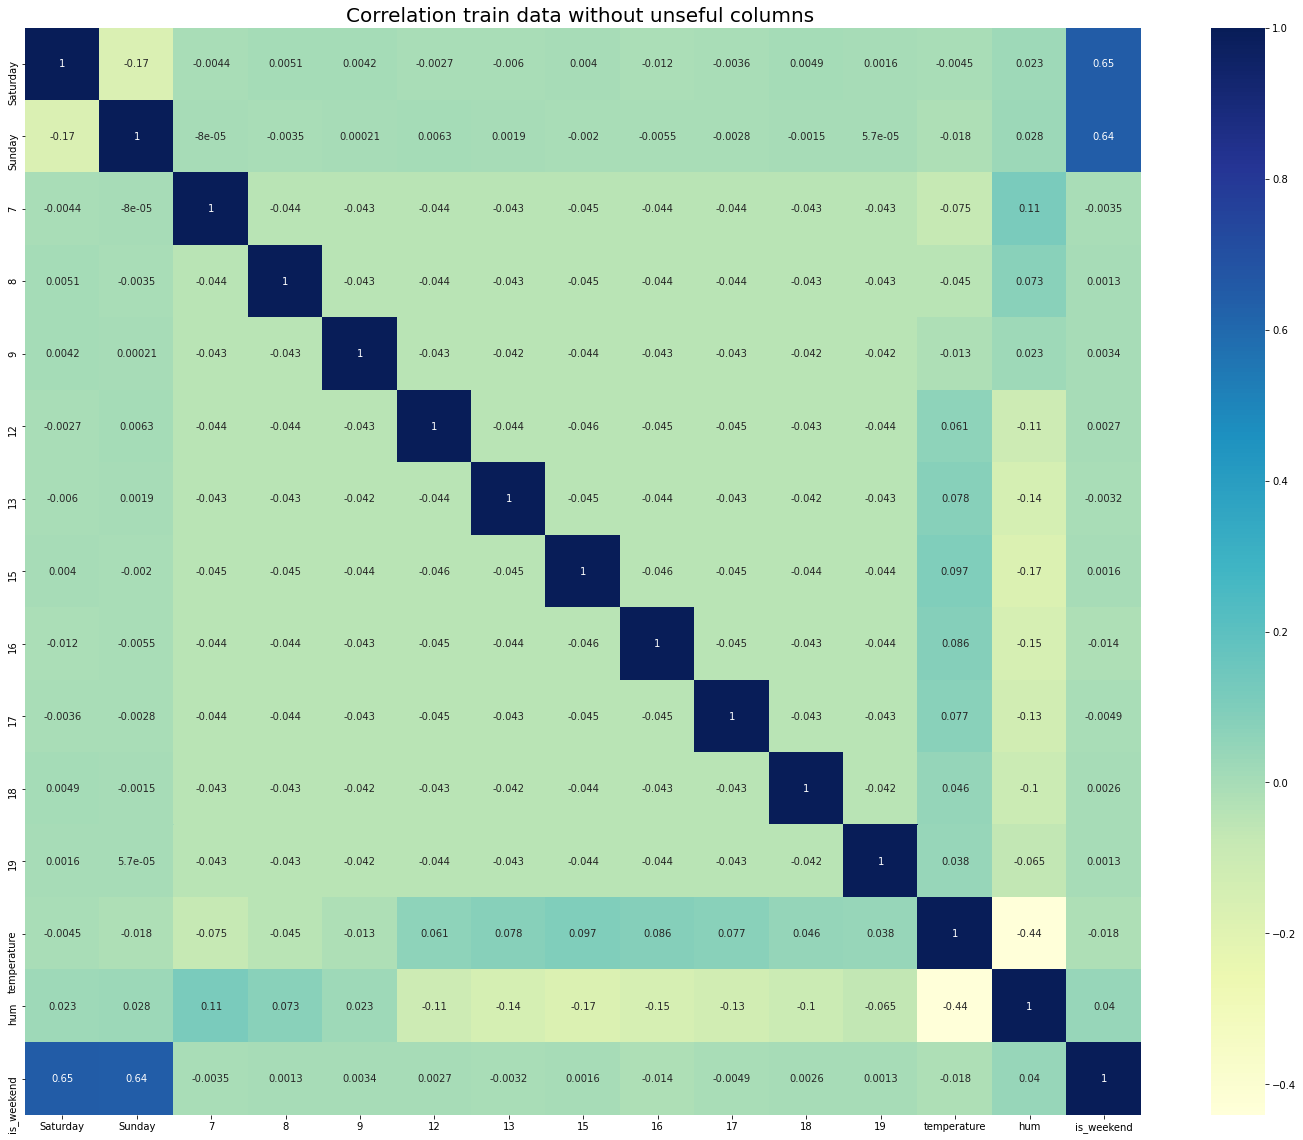

In [53]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(X_train_rfe.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation train data without unseful columns ", size=20)
plt.savefig('.\Isra_plots/Correlation_train_data_without_unseful_column_Stage3.png', dpi = 500);
plt.show()

In [72]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [73]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [74]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            bike_number   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1588.
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:44:59   Log-Likelihood:                 13392.
No. Observations:               12139   AIC:                        -2.675e+04
Df Residuals:                   12123   BIC:                        -2.663e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1423      0.004     32.351      

In [75]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

Fitting linear regression

R^2: 0.6627416801445905 

Coefficients
-------------------------------------
Intercept: 0.1422852548959226
Saturday: 1939190919.55
Sunday: 1939190919.55
7: 0.13
8: 0.3
9: 0.13
12: 0.07
13: 0.07
15: 0.08
16: 0.11
17: 0.25
18: 0.22
19: 0.11
temperature: 0.19
hum: -0.19
is_weekend: -1939190919.57

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


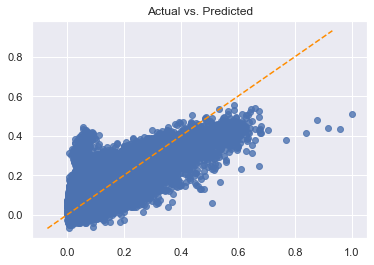

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with bike_number


Series([], Name: bike_number, dtype: float64)


Parameters that are most likely FOLLOW linearity assumption and their correlation with bike_number


temperature    0.384830
hum           -0.462627
Name: bike_number, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


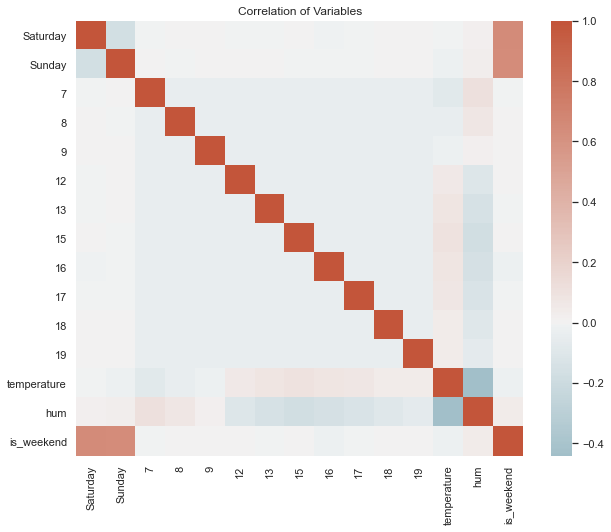

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Saturday: inf
Sunday: inf
is_weekend: inf
temperature: 4.27754242623387
hum: 3.889635620613605
15: 1.0967136237018726
16: 1.087135604271944
17: 1.083388499900418
13: 1.0826636704164134
12: 1.0793346275866984
7: 1.0771047790857353
8: 1.0708333195987585
18: 1.0701104472815315
19: 1.0697097621675618
9: 1.0645149125908824

3 cases of possible multicollinearity
3 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson:

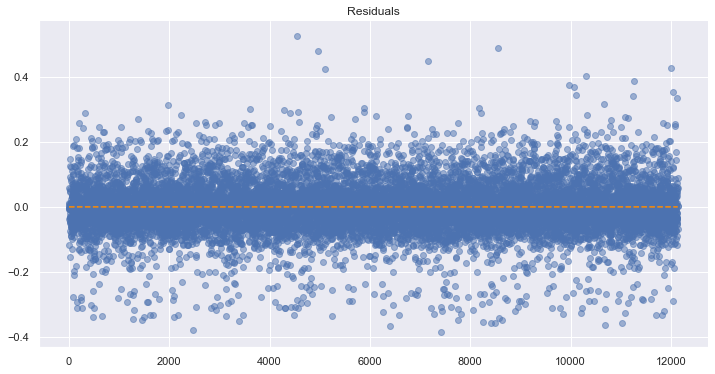

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 5887.552940046275,
 'pvalue for LM': 0.0,
 'F stats': 815.6577727802969,
 'pvalue for Fstats': 0.0}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


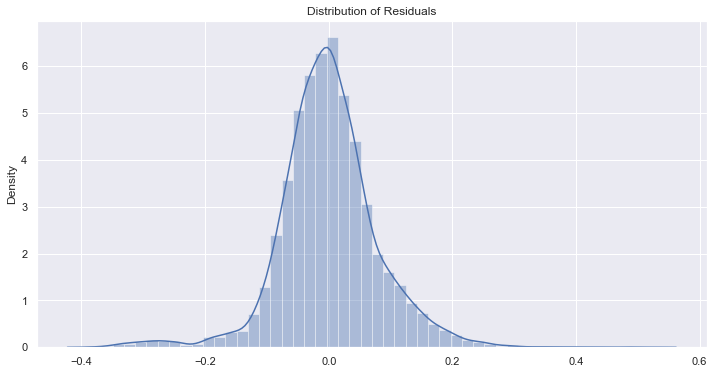


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


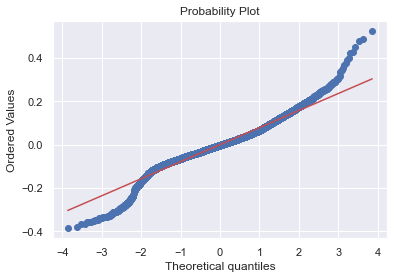


In your dataset you quite fat tails. You have 0.018 potential outliers (215 rows)


{'Satisfied': ['Linearity', 'Autocorrelation'],
 'Potentially': ['Autocorrelation', 'Sub-Normality'],
 'Violated': ['Multicollinearity', 'Normality']}

In [76]:
import Assumptions
tester = Assumptions.Assumption_Tester_OLS(X_train_rfe, y_train)
tester.run_all()

In [77]:
X_train_new1 = X_train_rfe.drop(["Saturday"], axis = 1)

In [78]:
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:            bike_number   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1702.
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:45:25   Log-Likelihood:                 13392.
No. Observations:               12139   AIC:                        -2.675e+04
Df Residuals:                   12124   BIC:                        -2.664e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1423      0.004     32.356      

In [79]:
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

Fitting linear regression

R^2: 0.6627417253673782 

Coefficients
-------------------------------------
Intercept: 0.1422920745851971
Sunday: 0.0
7: 0.13
8: 0.3
9: 0.13
12: 0.07
13: 0.07
15: 0.08
16: 0.11
17: 0.25
18: 0.22
19: 0.11
temperature: 0.19
hum: -0.19
is_weekend: -0.03

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


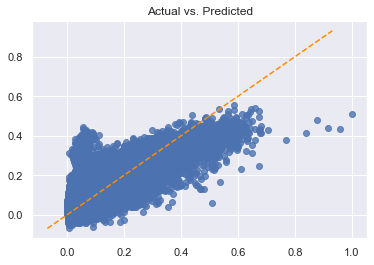

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with bike_number


Series([], Name: bike_number, dtype: float64)


Parameters that are most likely FOLLOW linearity assumption and their correlation with bike_number


temperature    0.384830
hum           -0.462627
Name: bike_number, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


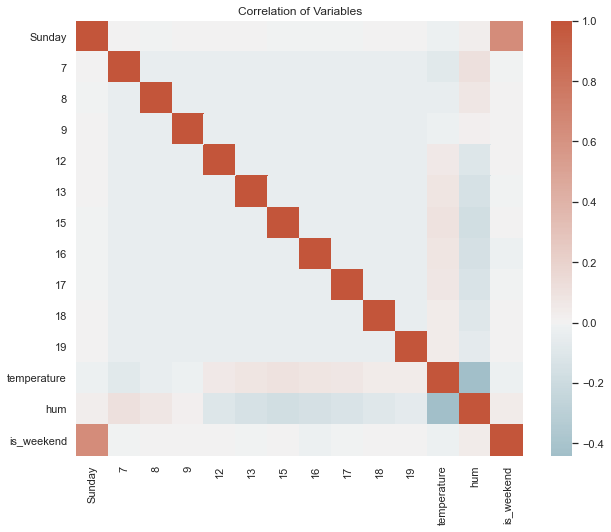

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
temperature: 4.278909645155678
hum: 3.8909469941734454
is_weekend: 2.3802074309527033
Sunday: 1.9906650783497468
15: 1.0967369370531455
16: 1.0887868837019317
17: 1.0833940332153347
13: 1.0826705425796792
12: 1.0793363224488013
7: 1.0771049062890172
8: 1.070833330171522
18: 1.0701132043662762
19: 1.06971664144748
9: 1.0645153211686467

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.021825100090207
Little to no autocorrelation 

Assumption satisfied

Assumption 4: Homoskedasticity of Err

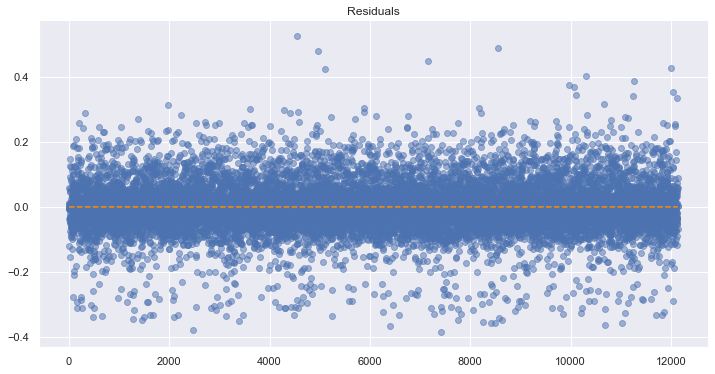

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 5887.249775689203,
 'pvalue for LM': 0.0,
 'F stats': 815.5762211613417,
 'pvalue for Fstats': 0.0}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


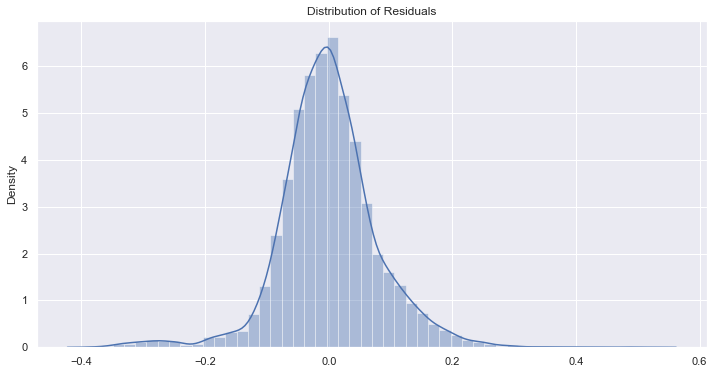


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


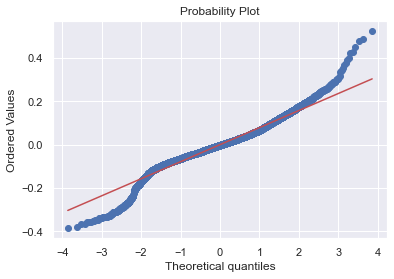


In your dataset you quite fat tails. You have 0.018 potential outliers (215 rows)


{'Satisfied': ['Linearity', 'Multicollinearity', 'Autocorrelation'],
 'Potentially': ['Autocorrelation', 'Sub-Normality'],
 'Violated': ['Normality']}

In [80]:
import Assumptions
tester = Assumptions.Assumption_Tester_OLS(X_train_lm1, y_train)
tester.run_all()

In [83]:
X_train_new2 = X_train_lm1.drop(['Sunday'], axis = 1)

In [84]:
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:            bike_number   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1833.
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:45:52   Log-Likelihood:                 13392.
No. Observations:               12139   AIC:                        -2.676e+04
Df Residuals:                   12125   BIC:                        -2.665e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1423      0.004     32.358      

In [85]:
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

Fitting linear regression

R^2: 0.6627413706000346 

Coefficients
-------------------------------------
Intercept: 0.14229330161027737
7: 0.13
8: 0.3
9: 0.13
12: 0.07
13: 0.07
15: 0.08
16: 0.11
17: 0.25
18: 0.22
19: 0.11
temperature: 0.19
hum: -0.19
is_weekend: -0.03

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


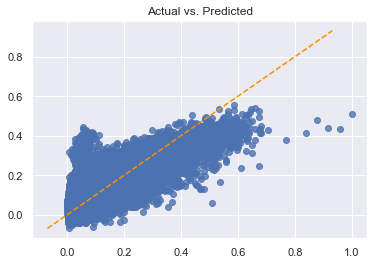

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with bike_number


Series([], Name: bike_number, dtype: float64)


Parameters that are most likely FOLLOW linearity assumption and their correlation with bike_number


temperature    0.384830
hum           -0.462627
Name: bike_number, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


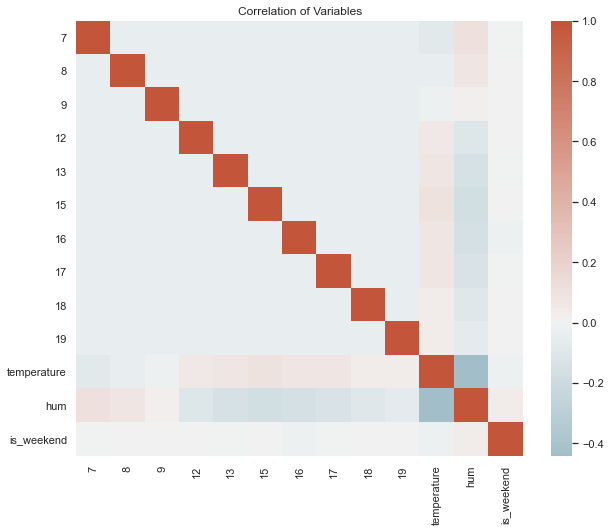

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
temperature: 4.278511227811469
hum: 3.890695119946696
is_weekend: 1.3896118706115186
15: 1.0967340239857657
16: 1.0887487604802706
17: 1.0833886973578752
13: 1.0826222924106066
12: 1.0792821062147018
7: 1.0770991939680297
8: 1.0708031354468894
18: 1.070105979647564
19: 1.0697165935575594
9: 1.0645108903261487

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.021791940001142
Little to no autocorrelation 

Assumption satisfied

Assumption 4: Homoskedasticity of Error Terms
Residuals should 

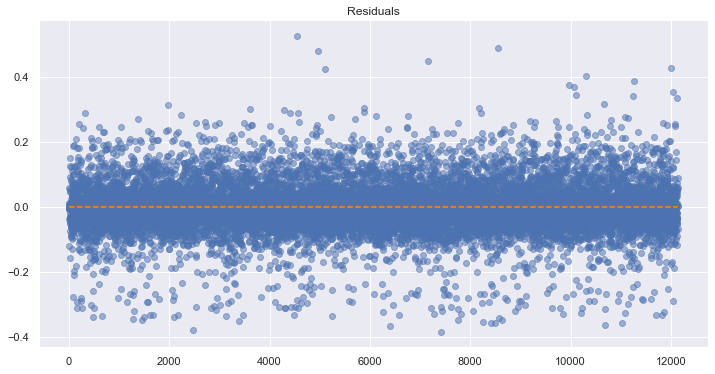

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 5883.957229822887,
 'pvalue for LM': 0.0,
 'F stats': 877.4319314503335,
 'pvalue for Fstats': 0.0}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


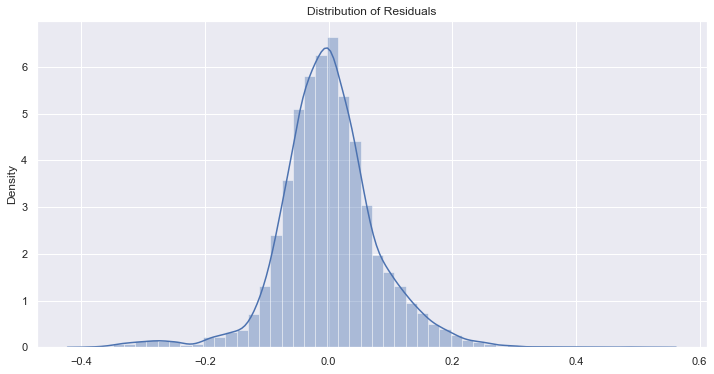


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


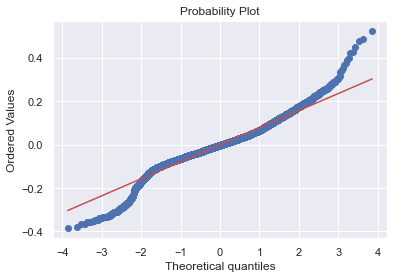


In your dataset you quite fat tails. You have 0.018 potential outliers (215 rows)


{'Satisfied': ['Linearity', 'Multicollinearity', 'Autocorrelation'],
 'Potentially': ['Autocorrelation', 'Sub-Normality'],
 'Violated': ['Normality']}

In [86]:
import Assumptions
tester = Assumptions.Assumption_Tester_OLS(X_train_lm2, y_train)
tester.run_all()

In [87]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temperature,4.28
11,hum,3.89
12,is_weekend,1.39
5,15,1.10
6,16,1.09
0,7,1.08
3,12,1.08
4,13,1.08
7,17,1.08
1,8,1.07


In [88]:
X_train_new3 = X_train_lm2.drop([9], axis = 1)

In [89]:
X_train_lm3 = sm.add_constant(X_train_new3)
lm3=sm.OLS(y_train,X_train_new3).fit()
print(lm3.summary())

                                 OLS Regression Results                                
Dep. Variable:            bike_number   R-squared (uncentered):                   0.808
Model:                            OLS   Adj. R-squared (uncentered):              0.808
Method:                 Least Squares   F-statistic:                              4246.
Date:                Thu, 08 Apr 2021   Prob (F-statistic):                        0.00
Time:                        14:46:17   Log-Likelihood:                          12272.
No. Observations:               12139   AIC:                                 -2.452e+04
Df Residuals:                   12127   BIC:                                 -2.443e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [90]:
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

Fitting linear regression

R^2: 0.6283150227325607 

Coefficients
-------------------------------------
Intercept: 0.15322050473493368
7: 0.13
8: 0.29
12: 0.06
13: 0.06
15: 0.07
16: 0.11
17: 0.24
18: 0.21
19: 0.1
temperature: 0.19
hum: -0.2
is_weekend: -0.03

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


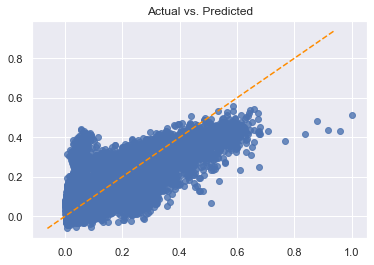

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with bike_number


Series([], Name: bike_number, dtype: float64)


Parameters that are most likely FOLLOW linearity assumption and their correlation with bike_number


temperature    0.384830
hum           -0.462627
Name: bike_number, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


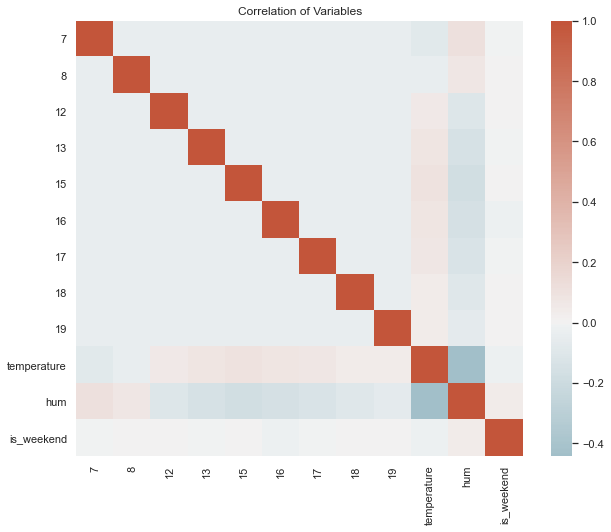

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
temperature: 4.255110941871838
hum: 3.861893114738319
is_weekend: 1.3894988234273553
15: 1.0928072501739101
16: 1.0848868620640566
17: 1.0795403299305657
13: 1.078946361077897
12: 1.0753425906545653
7: 1.072921106951298
8: 1.0666510267385905
18: 1.0665312633681696
19: 1.0658914497052936

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.026238485701552
Little to no autocorrelation 

Assumption satisfied

Assumption 4: Homoskedasticity of Error Terms
Residuals should have relative constant 

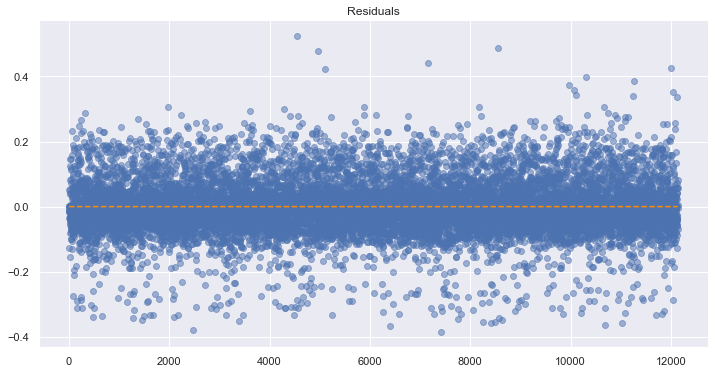

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 5394.839940842591,
 'pvalue for LM': 0.0,
 'F stats': 808.3935260127342,
 'pvalue for Fstats': 0.0}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


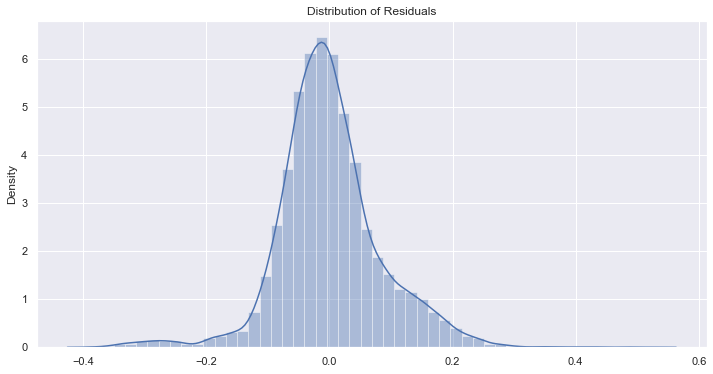


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


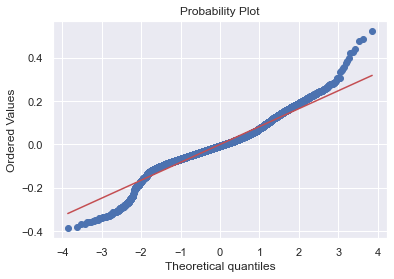


In your dataset you quite fat tails. You have 0.014 potential outliers (174 rows)


{'Satisfied': ['Linearity', 'Multicollinearity', 'Autocorrelation'],
 'Potentially': ['Autocorrelation', 'Sub-Normality'],
 'Violated': ['Normality']}

In [91]:
import Assumptions
tester = Assumptions.Assumption_Tester_OLS(X_train_lm3, y_train)
tester.run_all()

We get a R-Squared uncentered, We combe back to the X_train_lm2

Yes! Now we can see we have our model.

In [93]:
X_train_lm2=sm.add_constant(X_train_lm2)

In [94]:
X_train_lm2

,const,7,8,9,12,13,15,16,17,18,19,temperature,hum,is_weekend
2179,1.0,0,0,0,0,0,0,0,0,0,0,0.228571,0.753247,1.0
3821,1.0,0,0,0,0,0,0,1,0,0,0,0.700000,0.441558,0.0
14381,1.0,0,0,0,0,0,0,0,0,0,0,0.557143,0.779221,0.0
1452,1.0,0,0,0,0,0,0,0,0,0,0,0.357143,0.383117,0.0
866,1.0,0,0,0,0,0,0,0,0,0,0,0.142857,0.831169,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,1.0,0,0,0,0,0,0,0,0,1,0,0.200000,0.623377,0.0
79,1.0,1,0,0,0,0,0,0,0,0,0,0.185714,0.753247,0.0
12119,1.0,0,0,0,0,0,0,0,0,0,0,0.371429,0.701299,0.0
14147,1.0,0,0,0,0,0,0,0,0,0,0,0.514286,0.844156,0.0


In [95]:
y_train_pred = lm2.predict(X_train_lm2)

<Figure size 432x288 with 0 Axes>

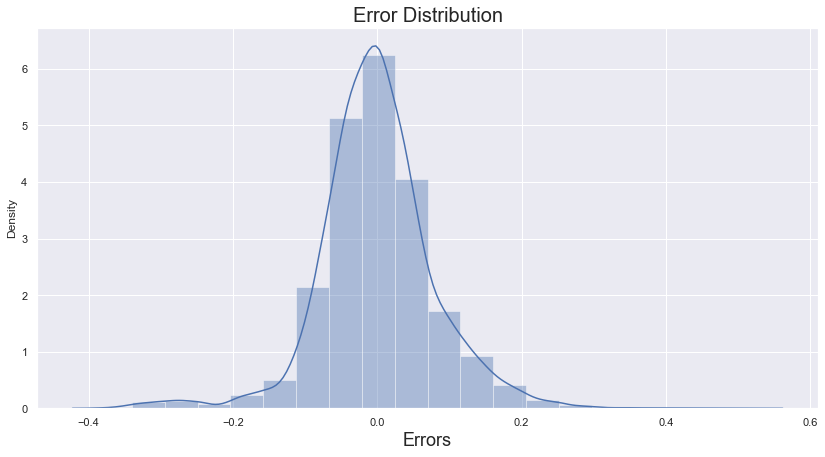

In [96]:

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.title('Error Distribution', size=20)
plt.savefig('.\Isra_plots/Model_Error_Distribution.png', dpi = 500);
plt.show()

In [97]:
#Create a list of numeric variables
num_vars=['temperature','hum','wind_speed','bike_number', 'temperature_feels']

#Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,21,22,23,bike_number,temperature,temperature_feels,hum,wind_speed,is_holiday,is_weekend
14468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.241349,0.700000,0.7375,0.272727,0.247788,0.0,0.0
8857,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0.026845,0.242857,0.2500,0.720779,0.371681,0.0,1.0
11562,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0.282570,0.485714,0.5500,0.467532,0.477876,1.0,0.0
10450,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0.134987,0.271429,0.2625,0.454545,0.601770,0.0,0.0
16625,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.006234,0.171429,0.2250,0.831169,0.159292,0.0,0.0


In [98]:
y_test = df_test.pop('bike_number')
X_test = df_test
X_test.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,20,21,22,23,temperature,temperature_feels,hum,wind_speed,is_holiday,is_weekend
count,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,...,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000
mean,0.082068,0.086104,0.079762,0.092062,0.083990,0.080146,0.081876,0.085335,0.080338,0.086296,...,0.044397,0.039785,0.045166,0.043436,0.382150,0.435066,0.642153,0.280713,0.019027,0.289256
std,0.274495,0.280545,0.270950,0.289142,0.277399,0.271545,0.274202,0.279407,0.271842,0.280828,...,0.205996,0.195472,0.207689,0.203857,0.159904,0.166118,0.184840,0.138952,0.136635,0.453461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.014286,0.037500,-0.032468,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.257143,0.300000,0.519481,0.176991,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.371429,0.450000,0.675325,0.265487,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.485714,0.550000,0.779221,0.362832,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.985714,0.987500,1.000000,0.991150,1.000000,1.000000


In [99]:
X_train_new2.columns

Index([7, 8, 9, 12, 13, 15, 16, 17, 18, 19, 'temperature', 'hum',
       'is_weekend'],
      dtype='object')

In [100]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new2.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,7,8,9,12,13,15,16,17,18,19,temperature,hum,is_weekend
14468,1.0,0,0,0,0,0,1,0,0,0,0,0.700000,0.272727,0.0
8857,1.0,0,0,0,0,0,0,0,0,0,0,0.242857,0.720779,1.0
11562,1.0,0,0,0,0,0,1,0,0,0,0,0.485714,0.467532,0.0
10450,1.0,0,0,0,0,0,1,0,0,0,0,0.271429,0.454545,0.0
16625,1.0,0,0,0,0,0,0,0,0,0,0,0.171429,0.831169,0.0


In [101]:
y_pred = lm2.predict(X_test_new1)

Finding R-squared and Adjusted R-Squared for Test set

In [102]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6555652686119045

In [103]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.6555652686119045)*(13-1)/(13-1-1)
print(Adj_r2)

0.6242530203038958


Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

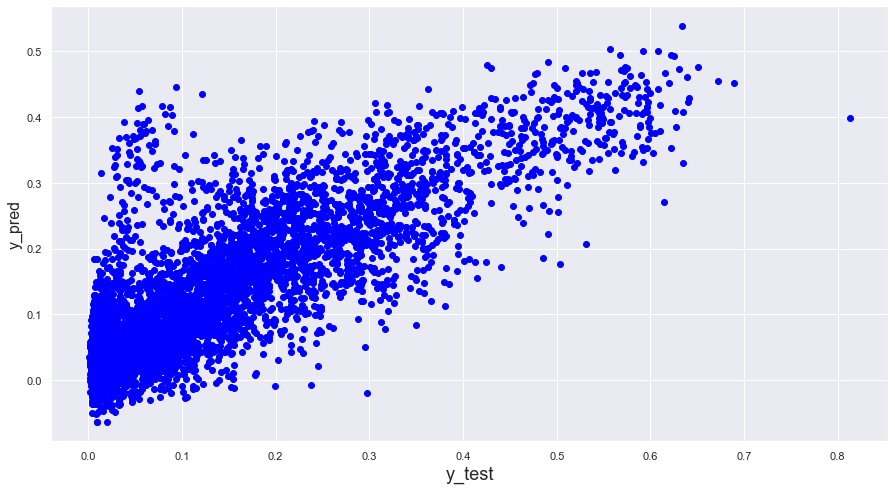

In [104]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

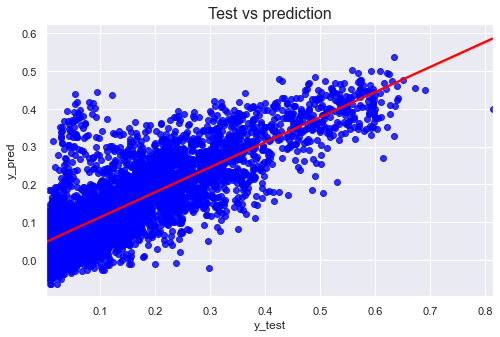

In [108]:
#Regression plot
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})


plt.xlabel('y_test', fontsize=12)                          # X-label
plt.ylabel('y_pred', fontsize=12)                          # Y-label
plt.title('Test vs prediction', size=16)
plt.savefig('.\Isra_plots/Test_vs_prediction_small.png', dpi = 500);
plt.show()

- Train R^2 : 0.628
- Train Adjusted R^2 : 0.628
- Test R^2: 0.655
- Test Adjusted R^2: 0.582
- Difference in R^2 between train and test: 2.07%
- Difference in adjusted R^2 between Train and test: 4.6% which is less than 5

```
from sklearn.preprocessing import MinMaxScaler
#df10 = scaler.inverse_transform(df10[bike_temperature])

```

In [110]:
df_y_test = pd.DataFrame(y_test)

In [111]:
df_y_pred = pd.DataFrame(y_pred)

In [112]:
df_y_test.sample(10)

,bike_number
16865,0.005725
6819,0.138931
12563,0.547710
6873,0.252545
477,0.026463
6958,0.015903
15242,0.157125
5669,0.170356
9992,0.143766
15523,0.003690


In [113]:
df_y_pred.sample(10)

,0
115,0.057248
8136,0.313434
517,0.060718
1989,0.042106
428,0.017570
12561,0.064848
8401,0.050771
14755,0.102717
12840,0.169358
11113,0.137669


```
from sklearn.preprocessing import StandardScaler
data = [[1,1], [2,3], [3,2], [1,1]]
scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.transform(data)
print(scaled)
# for inverse transformation
inversed = scaler.inverse_transform(scaled)
print(inversed)
```

In [114]:
result = pd.concat([df_y_test, df_y_pred], axis=1, join="outer")

In [115]:
result.rename(columns={0:'prediction'}, inplace=True)

In [91]:
#np.mean(np.abs((df11_error['bike_number_value']-df11_error['Y_pred_value']) / df11_error['bike_number_value']))*100

In [118]:
(['Y_pred_value']) / df11_error['bike_number_value']))*100result

SyntaxError: unmatched ')' (<ipython-input-118-564ae3430302>, line 1)

In [119]:
result['error%'] =np.abs((result['bike_number']-result['prediction'])/result['bike_number'])*100

In [120]:
np.mean(result['error%'])

149.50591243820944

In [121]:
result.rename(columns={0:'prediction'}, inplace=True)

<Figure size 432x288 with 0 Axes>

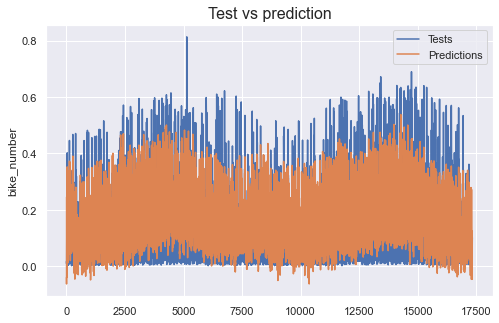

In [123]:
fig = plt.figure()
plt.figure(figsize=(8,5))
sns.lineplot(result.index, result['bike_number'], label='Tests')
sns.lineplot(result.index, result['prediction'], label='Predictions')
plt.title('Test vs prediction', size=16)
plt.savefig('.\Isra_plots/Test_vs_prediction_v2_small.png', dpi = 500);

Text(0.5, 0.98, 'Predicted versus actual count of bikes in london')

<Figure size 432x288 with 0 Axes>

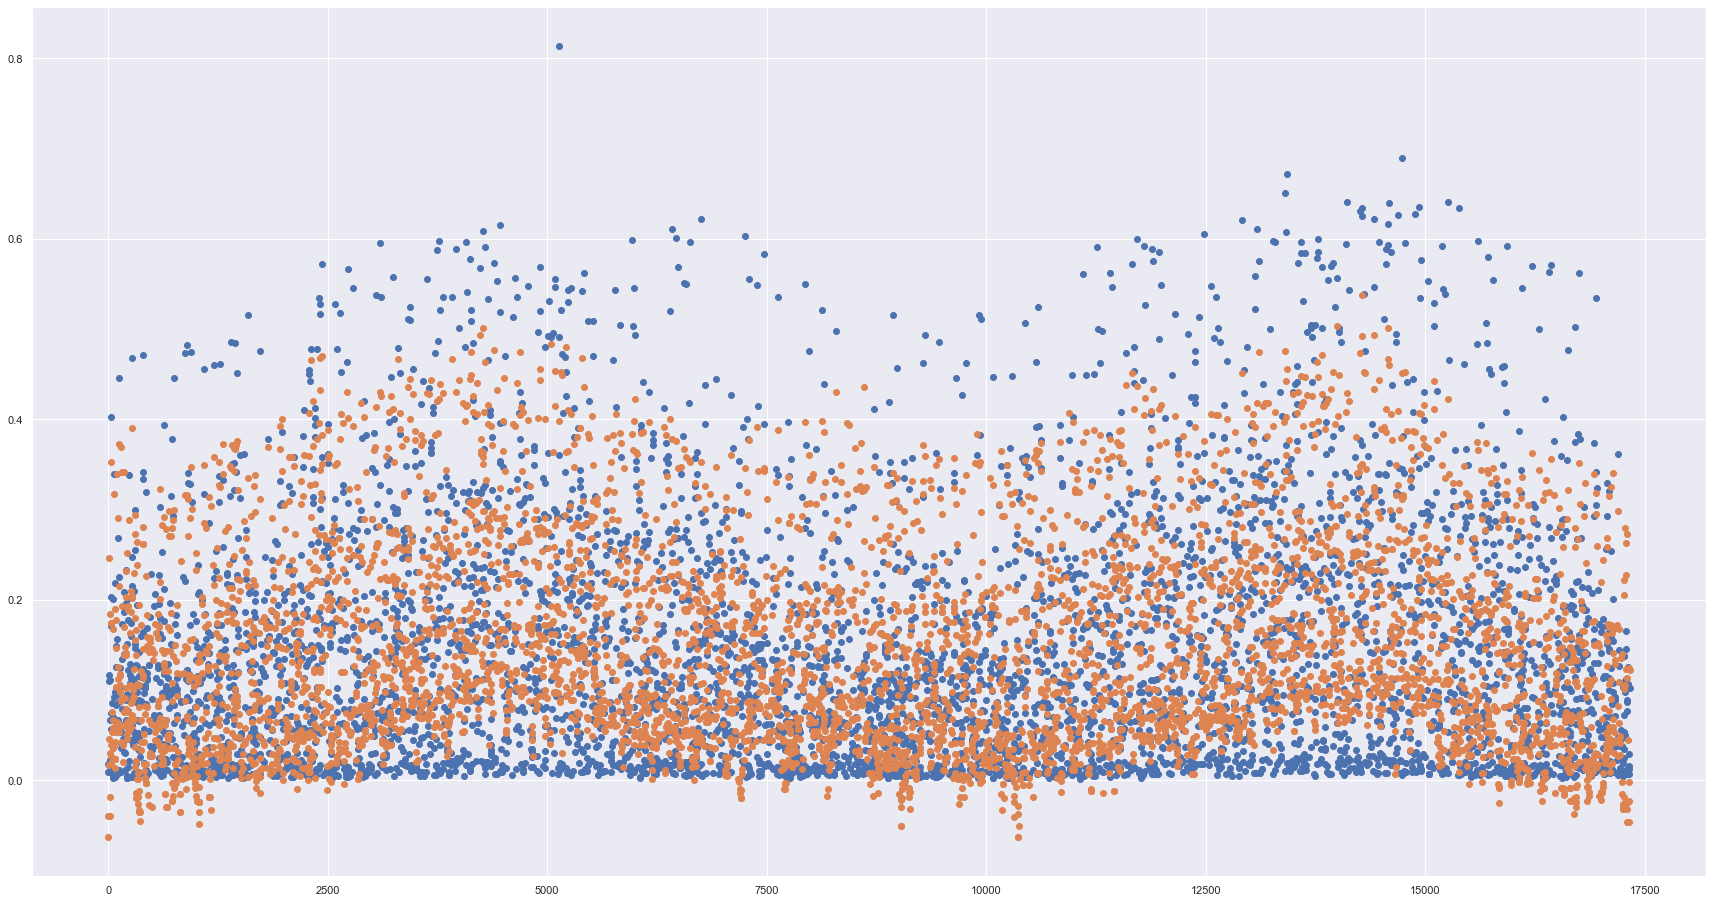

In [97]:
fig = plt.figure()
plt.figure(figsize=(30,16))
tests = plt.scatter(result.index, result['bike_number'])
predictions = plt.scatter(result.index, result['prediction'])

fig.suptitle('Predicted versus actual count of bikes in london')



In [ ]:
#scaler.inverse_transform(df10[bike_temperature])
#Fit on data
#df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
#df_train.head()


### LOGARITMIC APPROACH

In [ ]:
#letters: abcdefghijklmnopqrstuvwxyz
def find_the_number_plate(customer_id):
    flag = True
    